# Download Reanalysis: ERA5

### About


The notebook has the following outline:
* 1 - Download data from the CDS
* 2 - Hindcast data processing: calculate the reference climate mean
* 3 - Real-time forecasts: calculate seasonal forecast anomalies
* 4 - Visualize seasonal forecast monthly anomalies for a geographical subregion
  * 4.1 - Spatial maps
  * 4.2 - Time series of regional averages
* 5 - Reproduce C3S graphical products: compute 3-month anomalies

<br>

### Install packages

In [1]:
# Install CDS API for downloading data from the CDS
#!pip install cdsapi

In [ ]:
# Install cfgrib to enable us to read GRIB format files
#!conda install -c conda-forge cfgrib -y

In [6]:
# Miscellaneous operating system interfaces
import os

# CDS API
import cdsapi

# To map GRIB files to NetCDF Common Data Model
import cfgrib

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import pandas as pd
import scipy

# Libraries for plotting and geospatial data visualisation
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# To work with data labels in dictionary format
from collections import OrderedDict

# Date and time related libraries
from dateutil.relativedelta import relativedelta
from calendar import monthrange
import datetime

# Interactive HTML widgets
import ipywidgets as widgets

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

Here we specify a data directory where the reanalysis data is located and where we will save generated files

In [7]:
DATADIR = '/home/daniel/Documents/intoDBP/input/reanalysis/'

1. Air temperature

In [8]:
# Define the coordinates to interpolate to
interp_longitude=2.25 #reach1=reach2=2.25
interp_latitude=42.3  #reach1=42.3, reach2=42.05
variable_name = '2m_temperature'
var_short = 't2m'

In [9]:
daily_data_list_t2m = []

for year_num in range(1993,2024):

    era5 = xr.open_dataset(f'{DATADIR}/ecmwf_era5_'+ str(year_num) + '_hourly_' + var_short + '.grib', engine='cfgrib')
    
    era5_var = era5[var_short]

    #Interpolate the values for the specified coordinates
    hind_interp = era5_var.interp(latitude=interp_latitude, longitude=interp_longitude, method="nearest")

    #From hourly to daily 
    era5_24h = hind_interp.resample(time='1D').mean()
    daily_data_list_t2m.append(era5_24h)

#Merge years
era5_24h_all_t2m = xr.concat(daily_data_list_t2m, dim='time')

In [10]:
era5_24h_all_t2m

<xarray.DataArray 't2m' (time: 11322)> Size: 45kB
array([271.87097, 269.9624 , 268.8744 , ..., 278.04892, 276.90915,
       277.1599 ], dtype=float32)
Coordinates:
    number     int64 8B 0
    step       timedelta64[ns] 8B 00:00:00
    surface    float64 8B 0.0
    latitude   float64 8B 42.3
    longitude  float64 8B 2.25
  * time       (time) datetime64[ns] 91kB 1993-01-01 1993-01-02 ... 2023-12-31
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      25
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

2. Total Precipitation

In [11]:
# Define the coordinates to interpolate to
interp_longitude=2.25 #reach1=reach2=2.25
interp_latitude=42.3  #reach1=42.3, reach2=42.05
variable_name = 'total_precipitation'
var_short = 'tp'


In [12]:
daily_data_list_tp = []

for year_num in range(1993,2024):
    
    #convert data from hourly to daily
    #!cdo daysum {DATADIR + 'ecmwf_era5_'+ str(year_num) + '_hourly_' + var_short + '.grib'} {DATADIR + 'daily/ecmwf_era5_'+ str(year_num) + '_daily_' + var_short + '.grib'}

    era5 = xr.open_dataset(f'{DATADIR}/daily/ecmwf_era5_'+ str(year_num) + '_daily_' + var_short + '.grib', engine='cfgrib')
    
    era5_var = era5[var_short]

    #Interpolate the values for the specified coordinates
    era5_interp = era5_var.interp(latitude=interp_latitude, longitude=interp_longitude, method="nearest")

    #From hourly to daily 
    #era5_24h = hind_interp.resample(time='1D').mean()
    daily_data_list_tp.append(era5_interp)

#Merge years
era5_24h_all_tp = xr.concat(daily_data_list_tp, dim='time')


#era5 = xr.open_dataset(f'{DATADIR}/ecmwf_era5_'+ str(year_num) + '_daily_' + var_short + '.grib', engine='cfgrib')
    
#era5_var = era5[var_short]

    #Interpolate the values for the specified coordinates
#era5_interp = era5_var.interp(latitude=interp_latitude, longitude=interp_longitude, method="nearest")
  
    #From hourly to daily 
#era5_24h = era5_interp.resample(time='1D').sum()
#era5_var.resample(time='1D',closed='right').sum()

In [13]:
era5_24h_all_tp.values

array([0.0000000e+00, 4.7683716e-07, 5.4597855e-04, ..., 0.0000000e+00,
       0.0000000e+00, 1.3341904e-03], dtype=float32)

In [20]:
era5_24h_all_tp.time

array(['1993-01-01T11:30:00.000000000', '1993-01-02T11:30:00.000000000',
       '1993-01-03T11:30:00.000000000', ...,
       '2023-12-29T11:30:00.000000000', '2023-12-30T11:30:00.000000000',
       '2023-12-31T11:30:00.000000000'], dtype='datetime64[ns]')

In [22]:
era5_24h_all_tp.time.time

<xarray.DataArray 'time' (time: 11322)> Size: 91kB
array(['1993-01-01T11:30:00.000000000', '1993-01-02T11:30:00.000000000',
       '1993-01-03T11:30:00.000000000', ..., '2023-12-29T11:30:00.000000000',
       '2023-12-30T11:30:00.000000000', '2023-12-31T11:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 91kB 1993-01-01T11:30:00 ... 2023-12-31...
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
    valid_time  (time) datetime64[ns] 91kB 1993-01-01T11:30:00 ... 2023-12-31...
    latitude    float64 8B 42.3
    longitude   float64 8B 2.25
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [14]:
data_save = {'t2m': era5_24h_all_t2m.values-273.15, 'tp': era5_24h_all_tp.values*1000}

In [15]:
df_save = pd.DataFrame(data_save)

In [16]:
df_save

,t2m,tp
0,-1.279022,0.000000
1,-3.187592,0.000477
2,-4.275604,0.545979
3,-4.720642,0.009537
4,-1.125305,0.000000
...,...,...
11317,4.103088,0.000000
11318,3.316315,0.000000
11319,4.898926,0.000000
11320,3.759155,0.000000


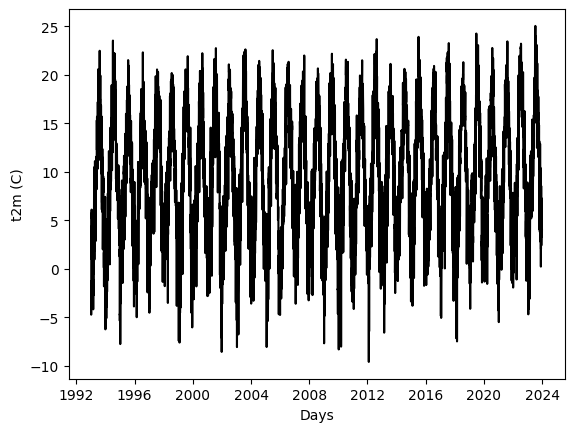

In [26]:
plt.plot(era5_24h_all_t2m.time, era5_24h_all_t2m-273.15, color='black')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('t2m (C)')
#plt.title('Data for each number')
#plt.legend()  # Add legend to differentiate lines
plt.show()

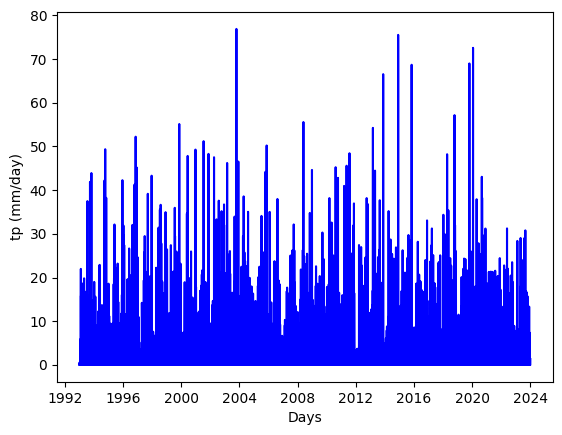

In [28]:
plt.plot(era5_24h_all_tp.time, era5_24h_all_tp.values*1000, color='blue')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('tp (mm/day)')
#plt.title('Data for each number')
#plt.legend()  # Add legend to differentiate lines
plt.show()